## Spatial Data Science (GIS6307/GEO4930)


<br>
Instructor: Yi Qiang (qiangy@usf.edu)<br>
Teaching Assistant: Jinwen Xu (jinwenxu@usf.edu)

---

# Workshop on Spatial Analysis of Twitter (Day 2)

This workshop will help you to get started with the acquisition, processing, and analysis of Twitter data using data science techniques. Specifically, you will learn:

- Streaming real-time tweets using Twitter Developer APIs.
- Processing the raw tweets into an analyzable form.
- Mapping, spatial analysis and natural language processing of Twitter data.

### Prerequisites
- Install Anaconda in your computer.
- Activation of Twitter Developer Account and approved **Elevated Access** before the workshop.
- Basic programming skills are recommended, but not required.


## 1. Install Python Libraries

Please open Anaconda Prompt.

1. Please run the following command in Anaconda Prompt to activate the conda environment `geo` that you created on Day 1. 
    
    - `conda activate geo`

2. Install the emoji library using the following command:

    `conda install -c conda-forge emoji`
    
3. Launch Jupyter Notebook using the following command:

    `jupyter notebook`
    

## 2. Read and Explore Data

Import libraries that are needed for this lab.

In [593]:
import nltk
import string
import tweepy
import pandas as pd
import emoji

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Print full cells in dataframes
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First, let's read tweets that are streamed in the previous class. If you don't have the data, you can also download a sample dataset from [**here**](https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/Twitter/tweets_putin.csv), and save it in the default directory of Jupyter Notebook (C:\Users\UserName for Windows and /Users/UserName for MacOS). 

In [594]:
tweets = pd.read_csv('tweets_putin.csv')

tweets.head()

username                 created_at  \
0                      Eugene B Douglas  2015-05-18 10:08:36+00:00   
1                    Linda Marie Garcia  2022-02-12 14:30:50+00:00   
2                   ひろ free paper 真実は一つ  2022-03-11 02:31:28+00:00   
3  Antonio García Martínez (agm.eth) 🇺🇦  2007-12-27 22:26:57+00:00   
4                    Antonio José Ramos  2013-06-12 09:22:04+00:00   

                                                                                                     geotag  \
0      [[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]   
1    [[-104.69356, 38.200638], [-104.69356, 38.338462], [-104.551992, 38.338462], [-104.551992, 38.200638]]   
2      [[135.191003, 34.683056], [135.191003, 34.768661], [135.259763, 34.768661], [135.259763, 34.683056]]   
3  [[-124.482003, 32.528832], [-124.482003, 42.009519], [-114.131212, 42.009519], [-114.131212, 32.528832]]   
4            [[-2.181299, 38.672083], [-2.181299, 39.186567], [-1.62259, 39.186567], [-1.62259, 38.672083]]   

                   user_location lang  \
0  Poud NYCier/speck IN universe   en   
1                            NaN   en   
2                            NaN   en   
3             High Desert Nevada   en   
4        Albacete... de momento.   en   

                                                                                                                                          tweet  
0                                                                                            Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️  
1  @visegrad24 @joncoopertweets It is about time.  Ukraine needs to become a member of NATO ASAP. This is something th… https://t.co/TGXfi9zO7d  
2                                                                                             I feel this war is by\nputin for putin putin waa!  
3  Curious how this view is shared by most Ukrainians and Westerners who’ve seen the conflict in person, while the opp… https://t.co/9lfFsosFb3  
4                                                                                                     @JohnKerry, please, stop taking drugs 😂😂😂

Print the total number of tweets.

In [595]:
len(tweets)

3552

## 3. Text Cleaning

Raw tweets may include many meaningless phrases, symbols and characters that are hard to understand for machines. Text cleaning is the process of removing the meaningless items and prepare raw text for Natural Language Processing (NLP). Text cleaning is an important step to get meaningful analysis results from text mining. Text cleaning includes the following basic steps.

- Remove punctuations, URLs, mentions and hashtags
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

### 3.1 Remove punctuations, URLs, mentions and hastags

Punctuations URLs, mentions and hastabs may cause trouble for machines to recognize meaningful words. The first step of text cleaning is to remove these noises.

The `string.punctuation` attribute contains a list of common puncutations, which will be removed. We also add some punctuations that are not included in the `string.puncuation` list.

In [596]:
# Combining punctuations in string.punctuation and other punctuations
punctuation = list(string.punctuation) + ['’','…','\n']

# Print the combined list of punctuations
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '’',
 '…',
 '\n']

Emojis are very popular in text messages and tweets. In Twitter, emojis are formed by punctuations, which cannot be recoginzed by machines. It will be helpful to convert emojis to words (i.e. demojize).

Next, we select the first tweet in the dataset and convert the emojis to words.

In [597]:
text = tweets['tweet'].iloc[5]
text

'Russia’s War of Terror on Ukraine🇺🇦must never be forgotten! We must keep,Putin out!of the,Free World🌍Putin is not t… https://t.co/OwCex5XkuT'

Use `emoji.demojize` to remove emojis

In [598]:
text = emoji.demojize(text, delimiters=(' ', ' '))
text

'Russia’s War of Terror on Ukraine Ukraine must never be forgotten! We must keep,Putin out!of the,Free World globe_showing_Europe-Africa Putin is not t… https://t.co/OwCex5XkuT'

Replace the delimiter with space

In [599]:
# Demojize
text = text.replace("::"," ").replace("_"," ").replace('mark',"")
# Split words by spaces
text

'Russia’s War of Terror on Ukraine Ukraine must never be forgotten! We must keep,Putin out!of the,Free World globe showing Europe-Africa Putin is not t… https://t.co/OwCex5XkuT'

In [600]:
text = tweets['tweet'].iloc[5]
text = emoji.demojize(text, delimiters=(' ', ' ')).replace("::"," ").replace("_"," ").replace('mark',"")

text = re.sub("@[A-Za-z0-9_]+"," ", text)

text = re.sub("#[A-Za-z0-9_]+"," ", text)

text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

for p in punctuation: text = text.replace(p, " ")
text = re.sub('[0-9]+', '', text)

text

'Russia s War of Terror on Ukraine Ukraine must never be forgotten  We must keep Putin out of the Free World globe showing Europe Africa Putin is not t  '

Next, we combine the steps of removing emojis, mentions, hashtags, URLs and punctuations in a function.

In [631]:
# import the re library for regular expression operations.
import re

# Define a function to remove punctuation in a text string
def remove_punct(text):
    
    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(' ', ' ')).replace("::"," ").replace("_"," ").replace('mark'," ")

    # Remove mentions
    text = re.sub("@[A-Za-z0-9_]+"," ", text)
    
    # Remove hashtags
    text = re.sub("#[A-Za-z0-9_]+"," ", text)
    
    # Remove URLs
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    
    # Remove punctuations
    #text  = "".join([char for char in text if char not in punctuation])
    for p in punctuation: text = text.replace(p, " ")
    text = re.sub('[0-9]+', '', text)
        
    return text

Then we use `apply` to map the `remove_punct` function to each tweet in the `tweet` column to remove mentions, hastags, URL and punctuations. The `apply` function is a simplified syntax of a `for` loop. 

In [632]:
# Apply remove_punct to each row in the dataframe
tweets['tweet_punct'] = tweets['tweet'].apply(lambda x: remove_punct(x))

# Preview the original tweets and processed tweets
tweets[['tweet','tweet_punct']].head(10)

tweet  \
0                                                                                            Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️   
1  @visegrad24 @joncoopertweets It is about time.  Ukraine needs to become a member of NATO ASAP. This is something th… https://t.co/TGXfi9zO7d   
2                                                                                             I feel this war is by\nputin for putin putin waa!   
3  Curious how this view is shared by most Ukrainians and Westerners who’ve seen the conflict in person, while the opp… https://t.co/9lfFsosFb3   
4                                                                                                     @JohnKerry, please, stop taking drugs 😂😂😂   
5  Russia’s War of Terror on Ukraine🇺🇦must never be forgotten! We must keep,Putin out!of the,Free World🌍Putin is not t… https://t.co/OwCex5XkuT   
6                                                                                 @cnni Do what Putin would not expect.  Admit Ukraine to NATO.   
7  I agree with you about Putin. But anyone who would prop up the likes of Pieces of Shit DA's Foxx, Gascon, Boudin an… https://t.co/Uh1WylC873   
8   Own it you butt head!!  Quit blaming inflation on Putin, it’s a result of YOUR sanctions on Putin and his ruble is… https://t.co/ksBrfCW6eh   
9                                                                                      @AFP There’s is no place for Putin on this earth anymore   

                                                                                                                                                                                                                                                                                                                                               tweet_punct  
0  Good deal  Ukraine  double exclamation   Slava Ukraini  flexed biceps  face with symbols on mouth  vulcan salute  Statue of Liberty  balance scale  folded hands  double exclamation    SOS button  thinking face  oncoming fist  United States  blue heart  cyclone  water wave  right facing fist  collision  left facing fist  double exclamation     
1                                                                                                                                                                                                                                                                 It is about time   Ukraine needs to become a member of NATO ASAP  This is something th    
2                                                                                                                                                                                                                                                                                                         I feel this war is by putin for putin putin waa   
3                                                                                                                                                                                                                                    Curious how this view is shared by most Ukrainians and Westerners who ve seen the conflict in person  while the opp    
4                                                                                                                                                                                                                                                       please  stop taking drugs  face with tears of joy  face with tears of joy  face with tears of joy   
5                                                                                                                                                                                                 Russia s War of Terror on Ukraine Ukraine must never be forgotten  We must keep Putin out of the Free World globe showing Europe Africa Putin is not t    
6                                                                            

### 3.2 Tokenization

Word tokenization, also known as word segmentation, divides a string of written language into its component words. White space is a good approximation of a word divider in English and many other languages with the help of some form of Latin alphabet.

First, we create a function to tokenize text by non alphanumeric symbols, such as white spaces and symbols not included in puctuations.

In [603]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

Tokenize the tweets without punctuations, and store the tokenized tweets in a new column. We also change all characters to lower case.

In [604]:
# Tokenize the tweets
tweets['tweet_tokenized'] = tweets['tweet_punct'].apply(lambda x: tokenization(x.lower()))

# Preview the tokenized tweets
tweets[['tweet_punct','tweet_tokenized']].head()

tweet_punct  \
0  Good deal Ukraine double exclamation Slava Ukraini flexed biceps face with symbols on mouth vulcan salute Statue of Liberty balance scale folded hands double exclamation SOS button thinking face oncoming fist United States blue heart cyclone water wave rightfacing fist collision leftfacing fist double exclamation   
1                                                                                                                                                                                                                                         It is about time Ukraine needs to become a member of NATO ASAP This is something th   
2                                                                                                                                                                                                                                                                              I feel this war is byputin for putin putin waa   
3                                                                                                                                                                                                           Curious how this view is shared by most Ukrainians and Westerners whove seen the conflict in person while the opp   
4                                                                                                                                                                                                                               please stop taking drugs face with tears of joy face with tears of joy face with tears of joy   

                                                                                                                                                                                                                                                                                                                                                            tweet_tokenized  
0  [good, deal, ukraine, double, exclamation, slava, ukraini, flexed, biceps, face, with, symbols, on, mouth, vulcan, salute, statue, of, liberty, balance, scale, folded, hands, double, exclamation, sos, button, thinking, face, oncoming, fist, united, states, blue, heart, cyclone, water, wave, rightfacing, fist, collision, leftfacing, fist, double, exclamation]  
1                                                                                                                                                                                                                                                                     [it, is, about, time, ukraine, needs, to, become, a, member, of, nato, asap, this, is, something, th]  
2                                                                                                                                                                                                                                                                                                                 [i, feel, this, war, is, byputin, for, putin, putin, waa]  
3                                                                                                                                                                                                                                    [curious, how, this, view, is, shared, by, most, ukrainians, and, westerners, whove, seen, the, conflict, in, person, while, the, opp]  
4                                                                                                                                                                                                                                                         [please, stop, taking, drugs, face, with, tears, of, joy, face, with, tears, of, joy, face, with, tears, of, joy]

### 3.3 Remove stop words

Stop words (e.g. a, the, for...) are frequently used in English text, but carry little information. In text mining, stop words may delute the words that carry actual meanings. Removing stop words can yield to more meaningful results from text mining.

The `nltk` library contains comprehensive lists of stop words in different languages. The following code get a list of stop words from `nltk.corpus.stopwords.words`, which will be removed later.

In [605]:
# Get a list of stopwords from nltk, plus rt and via. 
stopword = nltk.corpus.stopwords.words('english') + ['rt', 'via','amp','get',
                                                     'would','go','like','say',
                                                     "don\'t",'dont','need','want','think',
                                                     'show','know','let','putin']

stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Create a function to remove stop words

In [606]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

Apply the `remove_stopwords` function to the tokenized tweets.

In [607]:
tweets['tweet_nonstop'] = tweets['tweet_tokenized'].apply(lambda x: remove_stopwords(x))


tweets[['tweet_tokenized','tweet_nonstop']].head()

tweet_tokenized  \
0  [good, deal, ukraine, double, exclamation, slava, ukraini, flexed, biceps, face, with, symbols, on, mouth, vulcan, salute, statue, of, liberty, balance, scale, folded, hands, double, exclamation, sos, button, thinking, face, oncoming, fist, united, states, blue, heart, cyclone, water, wave, rightfacing, fist, collision, leftfacing, fist, double, exclamation]   
1                                                                                                                                                                                                                                                                     [it, is, about, time, ukraine, needs, to, become, a, member, of, nato, asap, this, is, something, th]   
2                                                                                                                                                                                                                                                                                                                 [i, feel, this, war, is, byputin, for, putin, putin, waa]   
3                                                                                                                                                                                                                                    [curious, how, this, view, is, shared, by, most, ukrainians, and, westerners, whove, seen, the, conflict, in, person, while, the, opp]   
4                                                                                                                                                                                                                                                         [please, stop, taking, drugs, face, with, tears, of, joy, face, with, tears, of, joy, face, with, tears, of, joy]   

                                                                                                                                                                                                                                                                                                                                                tweet_nonstop  
0  [good, deal, ukraine, double, exclamation, slava, ukraini, flexed, biceps, face, symbols, mouth, vulcan, salute, statue, liberty, balance, scale, folded, hands, double, exclamation, sos, button, thinking, face, oncoming, fist, united, states, blue, heart, cyclone, water, wave, rightfacing, fist, collision, leftfacing, fist, double, exclamation]  
1                                                                                                                                                                                                                                                                                           [time, ukraine, needs, become, member, nato, asap, something, th]  
2                                                                                                                                                                                                                                                                                                                                   [feel, war, byputin, waa]  
3                                                                                                                                                                                                                                                                         [curious, view, shared, ukrainians, westerners, whove, seen, conflict, person, opp]  
4                                                                                                                                                                                                                                                                         [please, stop, taking, drugs, face, tears, joy, face, tears, joy, face, tears, joy]

### 3.4 Word stemming

Word stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma (also known as Lammitization). Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

First, we create a function for word stemming.

In [608]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

Apply the function `stemming` to the `tweet_nonstop` column.

In [609]:
tweets['tweet_stemmed'] = tweets['tweet_nonstop'].apply(lambda x: stemming(x))

tweets[['tweet_nonstop','tweet_stemmed']].head()

tweet_nonstop  \
0  [good, deal, ukraine, double, exclamation, slava, ukraini, flexed, biceps, face, symbols, mouth, vulcan, salute, statue, liberty, balance, scale, folded, hands, double, exclamation, sos, button, thinking, face, oncoming, fist, united, states, blue, heart, cyclone, water, wave, rightfacing, fist, collision, leftfacing, fist, double, exclamation]   
1                                                                                                                                                                                                                                                                                           [time, ukraine, needs, become, member, nato, asap, something, th]   
2                                                                                                                                                                                                                                                                                                                                   [feel, war, byputin, waa]   
3                                                                                                                                                                                                                                                                         [curious, view, shared, ukrainians, westerners, whove, seen, conflict, person, opp]   
4                                                                                                                                                                                                                                                                         [please, stop, taking, drugs, face, tears, joy, face, tears, joy, face, tears, joy]   

                                                                                                                                                                                                                                                                                               tweet_stemmed  
0  [good, deal, ukrain, doubl, exclam, slava, ukraini, flex, bicep, face, symbol, mouth, vulcan, salut, statu, liberti, balanc, scale, fold, hand, doubl, exclam, so, button, think, face, oncom, fist, unit, state, blue, heart, cyclon, water, wave, rightfac, fist, collis, leftfac, fist, doubl, exclam]  
1                                                                                                                                                                                                                                                [time, ukrain, need, becom, member, nato, asap, someth, th]  
2                                                                                                                                                                                                                                                                                  [feel, war, byputin, waa]  
3                                                                                                                                                                                                                              [curiou, view, share, ukrainian, western, whove, seen, conflict, person, opp]  
4                                                                                                                                                                                                                               [pleas, stop, take, drug, face, tear, joy, face, tear, joy, face, tear, joy]

Print the original tweets and processed tweets in the four steps. Please compare their differences to learn what has been done at each step.

In [610]:
tweets[['tweet','tweet_punct','tweet_tokenized','tweet_nonstop','tweet_stemmed']].head()

tweet  \
0                                                                                            Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️   
1  @visegrad24 @joncoopertweets It is about time.  Ukraine needs to become a member of NATO ASAP. This is something th… https://t.co/TGXfi9zO7d   
2                                                                                             I feel this war is by\nputin for putin putin waa!   
3  Curious how this view is shared by most Ukrainians and Westerners who’ve seen the conflict in person, while the opp… https://t.co/9lfFsosFb3   
4                                                                                                     @JohnKerry, please, stop taking drugs 😂😂😂   

                                                                                                                                                                                                                                                                                                                  tweet_punct  \
0  Good deal Ukraine double exclamation Slava Ukraini flexed biceps face with symbols on mouth vulcan salute Statue of Liberty balance scale folded hands double exclamation SOS button thinking face oncoming fist United States blue heart cyclone water wave rightfacing fist collision leftfacing fist double exclamation   
1                                                                                                                                                                                                                                         It is about time Ukraine needs to become a member of NATO ASAP This is something th   
2                                                                                                                                                                                                                                                                              I feel this war is byputin for putin putin waa   
3                                                                                                                                                                                                           Curious how this view is shared by most Ukrainians and Westerners whove seen the conflict in person while the opp   
4                                                                                                                                                                                                                               please stop taking drugs face with tears of joy face with tears of joy face with tears of joy   

                                                                                                                                                                                                                                                                                                                                                            tweet_tokenized  \
0  [good, deal, ukraine, double, exclamation, slava, ukraini, flexed, biceps, face, with, symbols, on, mouth, vulcan, salute, statue, of, liberty, balance, scale, folded, hands, double, exclamation, sos, button, thinking, face, oncoming, fist, united, states, blue, heart, cyclone, water, wave, rightfacing, fist, collision, leftfacing, fist, double, exclamation]   
1                                                                                                                                                                                                                                                                     [it, is, about, time, ukraine, needs, to, become, a, member, of, nato, asap, this, is, something, th]   
2                                                                                                                                                                                                                                  

# 4. Frequency Analysis

## 4.1 Word Cloud
A word cloud (also known as a tag cloud) is a visual representation of words. Word cloud can highlight popular words and phrases based on frequency. Word cloud provides you with quick and simple visual insights that can lead to more in-depth analyses.

Before creating word cloud, we need to break the lists in the `tweet_tokenized`, `tweet_nonstop`, and `tweet_stemmed` to strings.

In [611]:
import numpy as np

tweets_raw = tweets.tweet.sum().replace("", "")

tweets_punct = tweets.tweet_punct.sum()

tweets_tokenized = tweets.tweet_tokenized.sum()
tweets_tokenized = ' '.join([str(tweet) for tweet in tweets_tokenized])

tweets_nonstop = tweets.tweet_nonstop.sum()
tweets_nonstop = ' '.join([str(tweet) for tweet in tweets_nonstop])

tweets_stemmed = tweets.tweet_stemmed.sum()
tweets_stemmed = ' '.join([str(tweet) for tweet in tweets_stemmed])

Create word clouds for the tweets at different processing steps. Comparing the word cloud, you can see how the 5 processing steps affect the word cloud.

(-0.5, 399.5, 199.5, -0.5)

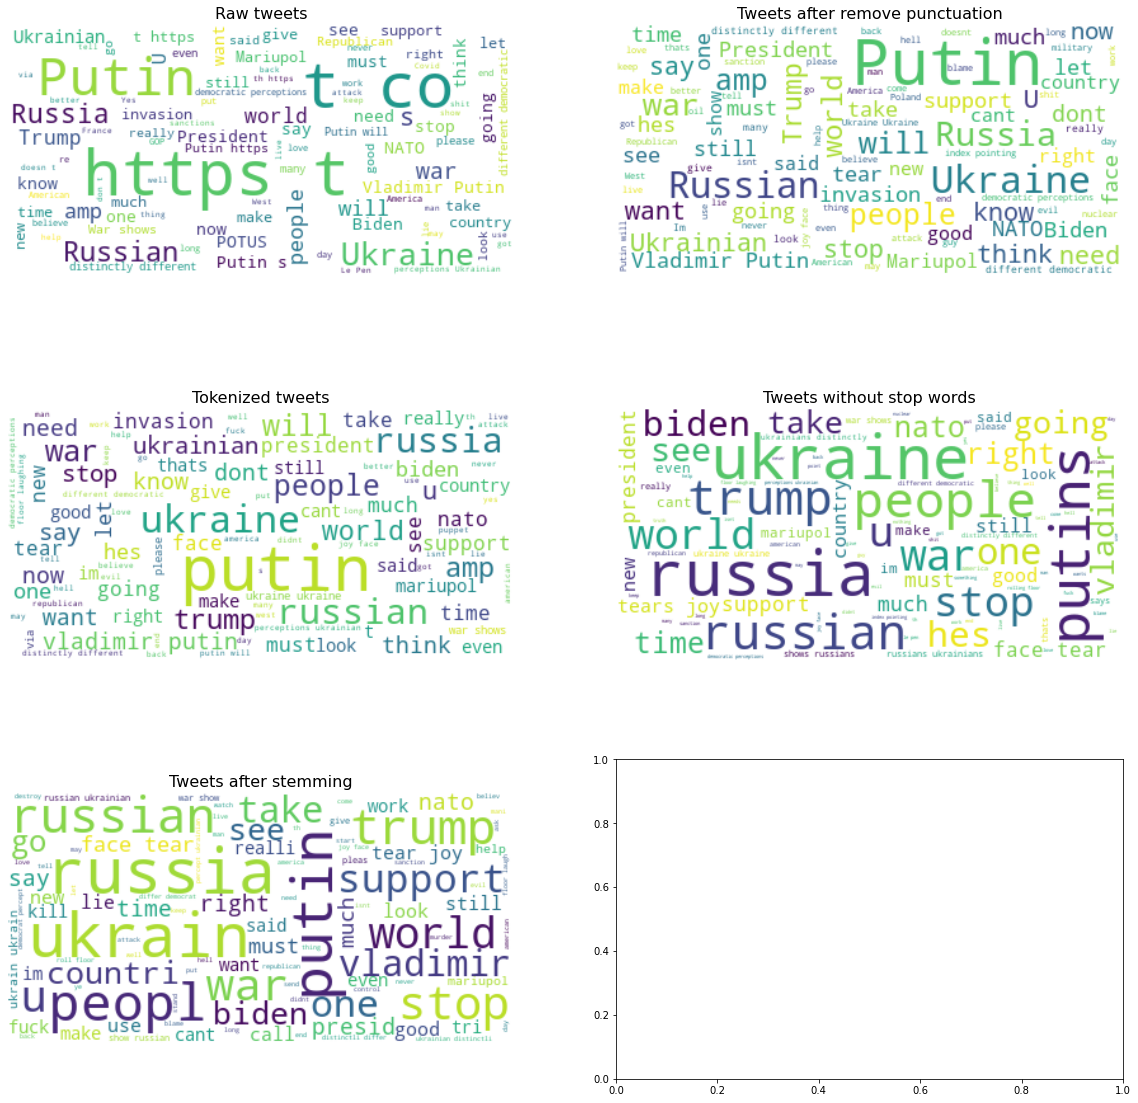

In [612]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
from wordcloud import WordCloud

# Create a plot with subplots arranged in 3 columns * 2 rows
fig, ax = plt.subplots(3, 2)

# Create word clouds for tweets at the 5 processing steps.
wordcloud_raw = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_raw)
wordcloud_punct = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_punct)
wordcloud_tokenized = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_tokenized)
wordcloud_nonstop = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_nonstop)
wordcloud_stemmed = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_stemmed)

# Display the word cloud to the subplots one by one
ax[0,0].imshow(wordcloud_raw, interpolation='bilinear')
ax[0,0].set_title('Raw tweets', fontsize=16)
ax[0,0].axis('off')

ax[0,1].imshow(wordcloud_punct, interpolation='bilinear')
ax[0,1].set_title('Tweets after remove punctuation',fontsize=16)
ax[0,1].axis('off')

ax[1,0].imshow(wordcloud_tokenized, interpolation='bilinear')
ax[1,0].set_title('Tokenized tweets',fontsize=16)
ax[1,0].axis('off')

ax[1,1].imshow(wordcloud_nonstop, interpolation='bilinear')
ax[1,1].set_title('Tweets without stop words',fontsize=16)
ax[1,1].axis('off')

ax[2,0].imshow(wordcloud_stemmed, interpolation='bilinear')
ax[2,0].set_title('Tweets after stemming',fontsize=16)
ax[2,0].axis('off')

## 4.2 Word Frequency in Bar Chart

In addition to word cloud, bar chart is useful graph to show word frequency. To create a bar chart, we need to combine all cleaned tweets and count the number of identical words. We can do this using `collections.Counter`. Finally, we will get the 15 most frequently appeared words.

In [613]:
import collections

# Combine all tweets in the tweet_stemmed column
all_tweets = tweets.tweet_stemmed.sum()

# Count the numbers of identical words in the tweets.
counts = collections.Counter(all_tweets)

# Get the 15 most frequently appeared words
most_common_words = counts.most_common(15)

Convert `most_common_words` to a dataframe, which is easier for analysis.

In [614]:
# Convert to dataframe
frequent_tweets = pd.DataFrame(most_common_words, columns=['words', 'count'])

# Print the dataframe
frequent_tweets

words  count
0      ukrain    425
1     russian    313
2      russia    285
3        face    282
4       putin    279
5         war    277
6       peopl    178
7   ukrainian    166
8       trump    160
9       world    154
10       stop    134
11         us    107
12   vladimir    101
13     presid     95
14    support     90

Create bar chart to display the most frequently appeared words.

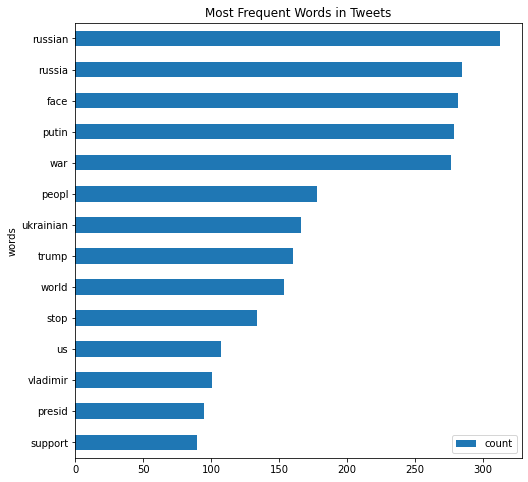

In [615]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
frequent_tweets[1:16].sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax)

ax.set_title("Most Frequent Words in Tweets")

plt.show()

# 5. Sentiment Analysis

As a common text mining technique, Sentiment analysis can be defined as a process that automates mining of attitudes, opinions, views and emotions from text, speech, tweets and database sources through Natural Language Processing (NLP). Sentiment analysis involves classifying opinions in text into categories like "negative" (score: 0), "neutral" (score 1)" or "positive" (score: -1). Sentiment analysis is also referred to as subjectivity analysis, opinion mining, and appraisal extraction.

Before sentiment analysis, we first break the lists in `tweet_stemmed` to bare strings of words separated by spaces, and store the converted tweets in a new column `tweet_stemmed2`.

In [616]:
# Convert the list of words to strings
tweets['tweet_stemmed2'] = tweets['tweet_stemmed'].apply(lambda x: ' '.join([str(tweet) for tweet in x]))

# Preview the converted strings
tweets[['tweet_stemmed','tweet_stemmed2']]

tweet_stemmed  \
0     [good, deal, ukrain, doubl, exclam, slava, ukraini, flex, bicep, face, symbol, mouth, vulcan, salut, statu, liberti, balanc, scale, fold, hand, doubl, exclam, so, button, think, face, oncom, fist, unit, state, blue, heart, cyclon, water, wave, rightfac, fist, collis, leftfac, fist, doubl, exclam]   
1                                                                                                                                                                                                                                                   [time, ukrain, need, becom, member, nato, asap, someth, th]   
2                                                                                                                                                                                                                                                                                     [feel, war, byputin, waa]   
3                                                                                                                                                                                                                                 [curiou, view, share, ukrainian, western, whove, seen, conflict, person, opp]   
4                                                                                                                                                                                                                                  [pleas, stop, take, drug, face, tear, joy, face, tear, joy, face, tear, joy]   
...                                                                                                                                                                                                                                                                                                         ...   
3547                                                                                                                                                                                                                                   [own, johnson, tori, partyon, reason, russian, bomb, wont, fall, london]   
3548                                                                                                                                                                                                                                                   [believ, time, stand, noth, ukrainian, soldier, abl, th]   
3549                                                                                                                                                                                                                                                                                               [cant, take]   
3550                                                                                                                                                                                             [water, wave, ukrain, world, must, come, togeth, stop, mass, murderhow, allow, one, individu, malign, narcici]   
3551                                                                                                                                                                                                                                                  [us, cancel, icbm, test, month, increas, tension, russia]   

                                                                                                                                                                                                                                                      tweet_stemmed2  
0     good deal ukrain doubl exclam slava ukraini flex bicep face symbol mouth vulcan salut statu liberti balanc scale fold hand doubl exclam so button think face oncom fist unit state blue heart cyclon water wave rightfac fist collis leftfac fist doubl exclam  
1                                                                              

Next, we use the `textblob` pacakge to calculate sentiment scores of the strings.

In [617]:
from textblob import TextBlob

# Calculate sentiment scores of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets.tweet_stemmed2]

# Print the sentiment scores of the first 20 tweets
[object.polarity for object in sentiment_objects][0:20]

[0.35,
 0.0,
 0.0,
 0.0,
 0.8000000000000002,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.05555555555555556,
 0.0,
 0.2333333333333333,
 0.0,
 -0.1,
 0.025,
 0.0,
 0.0,
 0.0,
 0.0]

Store the sentiment scores in a new column in the dataframe.

In [618]:
tweets['sentiment'] = [object.polarity for object in sentiment_objects]

tweets.head()

username                 created_at  \
0                      Eugene B Douglas  2015-05-18 10:08:36+00:00   
1                    Linda Marie Garcia  2022-02-12 14:30:50+00:00   
2                   ひろ free paper 真実は一つ  2022-03-11 02:31:28+00:00   
3  Antonio García Martínez (agm.eth) 🇺🇦  2007-12-27 22:26:57+00:00   
4                    Antonio José Ramos  2013-06-12 09:22:04+00:00   

                                                                                                     geotag  \
0      [[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]   
1    [[-104.69356, 38.200638], [-104.69356, 38.338462], [-104.551992, 38.338462], [-104.551992, 38.200638]]   
2      [[135.191003, 34.683056], [135.191003, 34.768661], [135.259763, 34.768661], [135.259763, 34.683056]]   
3  [[-124.482003, 32.528832], [-124.482003, 42.009519], [-114.131212, 42.009519], [-114.131212, 32.528832]]   
4            [[-2.181299, 38.672083], [-2.181299, 39.186567], [-1.62259, 39.186567], [-1.62259, 38.672083]]   

                   user_location lang  \
0  Poud NYCier/speck IN universe   en   
1                            NaN   en   
2                            NaN   en   
3             High Desert Nevada   en   
4        Albacete... de momento.   en   

                                                                                                                                          tweet  \
0                                                                                            Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️   
1  @visegrad24 @joncoopertweets It is about time.  Ukraine needs to become a member of NATO ASAP. This is something th… https://t.co/TGXfi9zO7d   
2                                                                                             I feel this war is by\nputin for putin putin waa!   
3  Curious how this view is shared by most Ukrainians and Westerners who’ve seen the conflict in person, while the opp… https://t.co/9lfFsosFb3   
4                                                                                                     @JohnKerry, please, stop taking drugs 😂😂😂   

                                                                                                                                                                                                                                                                                                                  tweet_punct  \
0  Good deal Ukraine double exclamation Slava Ukraini flexed biceps face with symbols on mouth vulcan salute Statue of Liberty balance scale folded hands double exclamation SOS button thinking face oncoming fist United States blue heart cyclone water wave rightfacing fist collision leftfacing fist double exclamation   
1                                                                                                                                                                                                                                         It is about time Ukraine needs to become a member of NATO ASAP This is something th   
2                                                                                                                                                                                                                                                                              I feel this war is byputin for putin putin waa   
3                                                                                                                                                                                                           Curious how this view is shared by most Ukrainians and Westerners whove seen the conflict in person while the opp   
4                                                                                                                                                                                                               

Next, we take a look at some tweets with most positive sentiment (-1). 

To do so, we sort the dataframe based on sentiment in an descending order, and then preview the first 5 tweets.

In [619]:
tweets.sort_values(by='sentiment', ascending=False).head()

username  \
3177                                             Nilo   
2535                                             Lily   
1011  Full sanctions and trade embargo on Russia now!   
3497                            Nancy Combest Bowling   
1830                                   Sergey Veygman   

                     created_at  \
3177  2012-11-27 23:50:30+00:00   
2535  2017-04-24 16:46:30+00:00   
1011  2016-06-22 20:30:46+00:00   
3497  2017-12-03 20:03:18+00:00   
1830  2011-01-27 14:22:22+00:00   

                                                                                                      geotag  \
3177            [[2.224101, 48.815521], [2.224101, 48.902146], [2.469905, 48.902146], [2.469905, 48.815521]]   
2535        [[-97.15606, 32.81088], [-97.15606, 32.881593], [-97.032953, 32.881593], [-97.032953, 32.81088]]   
1011          [[10.347678, 59.825462], [10.347678, 60.032132], [10.66412, 60.032132], [10.66412, 59.825462]]   
3497  [[-103.002652, 33.615765], [-103.002652, 37.002328], [-94.431332, 37.002328], [-94.431332, 33.615765]]   
1830          [[22.13572, 44.386383], [22.13572, 52.379475], [40.227172, 52.379475], [40.227172, 44.386383]]   

          user_location lang  \
3177     North Carolina   en   
2535           LA/PR/TX   en   
1011          𝕹𝖎𝖇𝖊𝖑𝖍𝖊𝖎𝖒   en   
3497  Duncan, Oklahoma    en   
1830      Kyiv, Ukraine   en   

                                                                                                                                             tweet  \
3177                                                                                                              Perfect!!!!! #VoteMacron #Macron   
2535                                                   Russia tests nuclear-capable missile that Putin calls best in world https://t.co/t2Wb272wBg   
1011                                                                                                   @marceldirsus Scholz is Putin's best asset.   
3497  @PressSec Like our Greatest Generation, Ukrainians, NATO, Allies, and people worldwide in democracies who support t… https://t.co/5dswiY2f6n   
1830                                                          @tarasmi At best, insiders are people who know people who saw Putin a few weeks ago.   

                                                                                                tweet_punct  \
3177                                                                                                Perfect   
2535                                     Russia tests nuclearcapable missile that Putin calls best in world   
1011                                                                            Scholz is Putins best asset   
3497  Like our Greatest Generation Ukrainians NATO Allies and people worldwide in democracies who support t   
1830                              At best insiders are people who know people who saw Putin a few weeks ago   

                                                                                                            tweet_tokenized  \
3177                                                                                                              [perfect]   
2535                                          [russia, tests, nuclearcapable, missile, that, putin, calls, best, in, world]   
1011                                                                                      [scholz, is, putins, best, asset]   
3497  [like, our, greatest, generation, ukrainians, nato, allies, and, people, worldwide, in, democracies, who, support, t]   
1830                              [at, best, insiders, are, people, who, know, people, who, saw, putin, a, few, weeks, ago]   

                                                                                  tweet_nonstop  \
3177                                                                                  [perfect]   
2535                               [russia, tests, nuclearcapable, missile, calls, best, world] 

Create a histogram to show distribution of  sentiment.

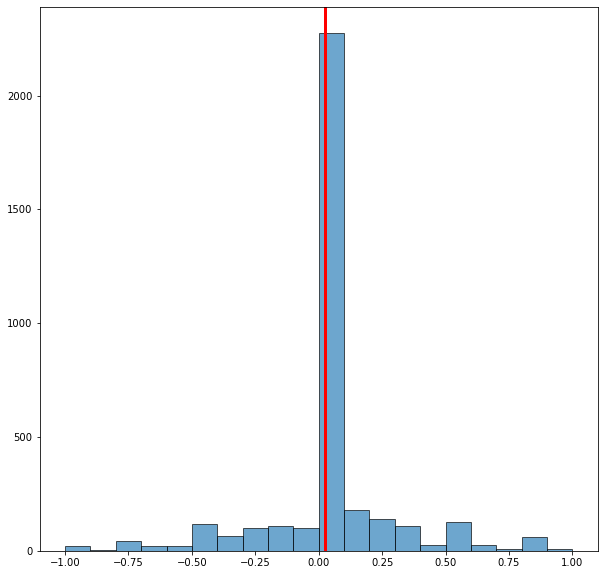

In [620]:
# Create a canvas in a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot histogram 
plt.hist(tweets['sentiment'], bins=20,edgecolor='k', alpha=0.65)
plt.axvline(tweets['sentiment'].mean(), color='red', linewidth=3)

In the sentiment analysis, many words don't have a positive/negative sentiment, and are assigned neutral (0) sentiment. So a large number of tweets have a 0 sentiment, creating a high bar in the middle. 

Let's check how many tweets have 0 sentiment:

In [621]:
print("{} out of {} tweets have neutral (zero) sentiment.".format(len(tweets[tweets['sentiment']==0]), len(tweets)))

2115 out of 3552 tweets have neutral (zero) sentiment.


Most tweets have a neutral sentiment. So it makes sense to remove neutral tweets and only keeps tweets with a positive and negative sentiment. The following code select tweets with non-zero sentiment and store them in `tweets2`.

In [622]:
tweets2 = tweets[tweets['sentiment']!=0]

Create the histogram with non-zero sentiment tweets.

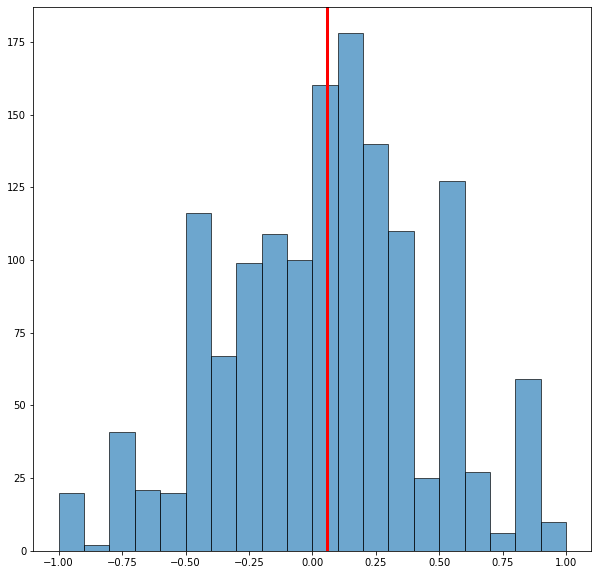

In [623]:
# Create a canvas in a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot histogram 
plt.hist(tweets2['sentiment'], bins=20,edgecolor='k', alpha=0.65)
plt.axvline(tweets2['sentiment'].mean(), color='red', linewidth=3)


# 6. Create heat map for sentiment

Heat map (also known as kernel density map) is a common approach to visualise clusters of points. Heat map use color gradients to display density variation of points. Other than treating the points equally, heat map can also include a "population" attribute to weigh the points.

In this task, we will create a heat map to display clusters of tweets using sentiment scores as the population field.


## 6.1 Calculating centroids of geotags

Heat map applies to point data. So we use centroids of geotags (bounding box) to represent the tweet locations.

The `geotag` column contains bounding boxes in the Well-Known Text (WKT) format as strings. Next, we will use the `json` package to convert the WKT strings to lists, and store the lists in a new column `geotag2`. The lists are easier to access coordinates of the bounding boxes.

In [624]:
import json

# Convert the string to lists
tweets2['geotag2'] = tweets2['geotag'].apply(lambda st: json.loads(st))

tweets2.head()

C:\Users\yi\AppData\Local\Temp/ipykernel_31700/179519524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets2['geotag2'] = tweets2['geotag'].apply(lambda st: json.loads(st))


username                 created_at  \
0      Eugene B Douglas  2015-05-18 10:08:36+00:00   
4    Antonio José Ramos  2013-06-12 09:22:04+00:00   
7         Paul Palandri  2018-09-21 10:55:25+00:00   
10  Mario Antone Monroe  2011-10-17 03:57:45+00:00   
12       Cecilie Holter  2014-01-19 11:52:25+00:00   

                                                                                                      geotag  \
0       [[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]   
4             [[-2.181299, 38.672083], [-2.181299, 39.186567], [-1.62259, 39.186567], [-1.62259, 38.672083]]   
7         [[-87.852247, 42.15223], [-87.852247, 42.223334], [-87.759091, 42.223334], [-87.759091, 42.15223]]   
10  [[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]   
12              [[-0.21607, 51.509879], [-0.21607, 51.539792], [-0.13016, 51.539792], [-0.13016, 51.509879]]   

                    user_location lang  \
0   Poud NYCier/speck IN universe   en   
4         Albacete... de momento.   en   
7                             NaN   en   
10            Los Angeles, CA USA   en   
12                   Planet Earth   en   

                                                                                                                                           tweet  \
0                                                                                             Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️   
4                                                                                                      @JohnKerry, please, stop taking drugs 😂😂😂   
7   I agree with you about Putin. But anyone who would prop up the likes of Pieces of Shit DA's Foxx, Gascon, Boudin an… https://t.co/Uh1WylC873   
10  Putin is short little angry murderous dictator complicit to rape and gay abashing because along with this small lit… https://t.co/nZCWn0V3A1   
12  And yet not once calling out the perpetrator Putin by name. That’s not good enough. Yes, to keep channels open with… https://t.co/B6AKk5MHVx   

                                                                                                                                                                                                                                                                                                                   tweet_punct  \
0   Good deal Ukraine double exclamation Slava Ukraini flexed biceps face with symbols on mouth vulcan salute Statue of Liberty balance scale folded hands double exclamation SOS button thinking face oncoming fist United States blue heart cyclone water wave rightfacing fist collision leftfacing fist double exclamation   
4                                                                                                                                                                                                                                please stop taking drugs face with tears of joy face with tears of joy face with tears of joy   
7                                                                                                                                                                                                              I agree with you about Putin But anyone who would prop up the likes of Pieces of Shit DAs Foxx Gascon Boudin an   
10                                                                                                                                                                                                         Putin is short little angry murderous dictator complicit to rape and gay abashing because along with this small lit   
12                                                                                                                                                                                                             And yet not once calling out the perpetrator Putin by name

Next, we can access coordiantes in `geotag2` to calculate coordinates of centroids of the bounding boxes.

In [625]:
# Calculate coordinates of bounding box centroid
tweets2['point']  = tweets2['geotag2'].apply(lambda s: [(s[0][1]+s[2][1])/2,(s[0][0]+s[2][0])/2])

# Get the latitude of the centroid 
tweets2['lat']  = tweets2['geotag2'].apply(lambda s: (s[0][1]+s[2][1])/2)

# Get the longitude of the centroid 
tweets2['lon']  = tweets2['geotag2'].apply(lambda s: (s[0][0]+s[2][0])/2)

# Preview the geotweets
tweets2.head()

C:\Users\yi\AppData\Local\Temp/ipykernel_31700/3715866773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets2['point']  = tweets2['geotag2'].apply(lambda s: [(s[0][1]+s[2][1])/2,(s[0][0]+s[2][0])/2])
C:\Users\yi\AppData\Local\Temp/ipykernel_31700/3715866773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets2['lat']  = tweets2['geotag2'].apply(lambda s: (s[0][1]+s[2][1])/2)
C:\Users\yi\AppData\Local\Temp/ipykernel_31700/3715866773.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

username                 created_at  \
0      Eugene B Douglas  2015-05-18 10:08:36+00:00   
4    Antonio José Ramos  2013-06-12 09:22:04+00:00   
7         Paul Palandri  2018-09-21 10:55:25+00:00   
10  Mario Antone Monroe  2011-10-17 03:57:45+00:00   
12       Cecilie Holter  2014-01-19 11:52:25+00:00   

                                                                                                      geotag  \
0       [[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]   
4             [[-2.181299, 38.672083], [-2.181299, 39.186567], [-1.62259, 39.186567], [-1.62259, 38.672083]]   
7         [[-87.852247, 42.15223], [-87.852247, 42.223334], [-87.759091, 42.223334], [-87.759091, 42.15223]]   
10  [[-118.668404, 33.704538], [-118.668404, 34.337041], [-118.155409, 34.337041], [-118.155409, 33.704538]]   
12              [[-0.21607, 51.509879], [-0.21607, 51.539792], [-0.13016, 51.539792], [-0.13016, 51.509879]]   

                    user_location lang  \
0   Poud NYCier/speck IN universe   en   
4         Albacete... de momento.   en   
7                             NaN   en   
10            Los Angeles, CA USA   en   
12                   Planet Earth   en   

                                                                                                                                           tweet  \
0                                                                                             Good deal 🇺🇦‼️Slava Ukraini 💪🤬🖖🗽⚖️🙏‼️🆘🤔👊🇺🇸💙🌀🌊🤜💥🤛‼️   
4                                                                                                      @JohnKerry, please, stop taking drugs 😂😂😂   
7   I agree with you about Putin. But anyone who would prop up the likes of Pieces of Shit DA's Foxx, Gascon, Boudin an… https://t.co/Uh1WylC873   
10  Putin is short little angry murderous dictator complicit to rape and gay abashing because along with this small lit… https://t.co/nZCWn0V3A1   
12  And yet not once calling out the perpetrator Putin by name. That’s not good enough. Yes, to keep channels open with… https://t.co/B6AKk5MHVx   

                                                                                                                                                                                                                                                                                                                   tweet_punct  \
0   Good deal Ukraine double exclamation Slava Ukraini flexed biceps face with symbols on mouth vulcan salute Statue of Liberty balance scale folded hands double exclamation SOS button thinking face oncoming fist United States blue heart cyclone water wave rightfacing fist collision leftfacing fist double exclamation   
4                                                                                                                                                                                                                                please stop taking drugs face with tears of joy face with tears of joy face with tears of joy   
7                                                                                                                                                                                                              I agree with you about Putin But anyone who would prop up the likes of Pieces of Shit DAs Foxx Gascon Boudin an   
10                                                                                                                                                                                                         Putin is short little angry murderous dictator complicit to rape and gay abashing because along with this small lit   
12                                                                                                                                                                                                             And yet not once calling out the perpetrator Putin by name

## 6.2 Create Heat Maps for positive and negative sentiment tweets

Split the dataframe to two dataframes with positive and negative sentiment. Ideally, we should create a kernel density map using sentiment as the population parameter (as the figure below). However, `folium` does not support negative population. So we will work around it by mapping positive and negative sentiment in separate layers and overlay them in a map.

![](https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/image/twitter/kernel.jpg)

![](https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/image/twitter/kde.png)

We first separate positive and negative tweets, and then convert negative scores to positive.

In [626]:
# Select tweets with positive (>1) and negative (<1) sentiment 
positive = tweets2.loc[tweets2['sentiment']>0,['lat','lon','sentiment']]
negative = tweets2.loc[tweets2['sentiment']<0,['lat','lon','sentiment']]

# Convert the positve tweets to an numpy array
positive = np.array(positive)

# Convert the negative tweets to an numpy array
negative['sentiment'] = negative['sentiment'].abs()
negative = np.array(negative)

Create heat maps for positive and negative sentiment tweets

In [627]:
import folium
from folium.plugins import HeatMap
import branca.colormap as cm
from collections import defaultdict


lon, lat = tweets2['lon'].mean(), tweets2['lon'].mean()
zoom_level = 1

steps = 20


m = folium.Map([lon, lat], tiles='stamentoner', zoom_start=zoom_level)


#colormap_pos=cm.linear.Blues_09.scale(0,1).to_step(steps)
colormap_pos = cm.LinearColormap(colors=['white','blue'], index=[0,1],vmin=0,vmax=1)

gradient_map_pos=defaultdict(dict)
for i in range(steps):
    gradient_map_pos[1/steps*i] = colormap_pos.rgb_hex_str(1/steps*i)
#colormap_pos.add_to(m) #add color bar at the top of the map

colormap = cm.LinearColormap(colors=['red','white','blue'], index=[-1,0,1],vmin=-1,vmax=1, caption='Total Standard deviation at the point[mm]')

data_pos = (positive).tolist()
HeatMap(data_pos,gradient = gradient_map_pos,min_opacity=0.5).add_to(folium.FeatureGroup(name='Positive').add_to(m))
colormap.add_to(m)


#colormap_neg=cm.linear.Reds_09.scale(0,1).to_step(steps)
colormap_neg = cm.LinearColormap(colors=['white','red'], index=[0,1],vmin=0,vmax=1)

gradient_map_neg=defaultdict(dict)
for i in range(steps):
    gradient_map_neg[1/steps*i] = colormap_neg.rgb_hex_str(1/steps*i)
#colormap_neg.add_to(m) #add color bar at the top of the map

data_neg = (negative).tolist()
HeatMap(data_neg,gradient = gradient_map_neg,min_opacity=0.5).add_to(folium.FeatureGroup(name='Negative').add_to(m))
folium.LayerControl().add_to(m)

m